In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Conexión a BD
# ==============================================================================
import pyodbc

In [3]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


In [4]:
dFechaInicio = '2020-01-01'
dFechaFin = '2020-12-31'

In [5]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,0))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

In [6]:
arrPlagas = df["Plaga"].unique()
arrFiltrado = df["Filtrado"].unique()

In [7]:
arrPlagas

array(['OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI',
       'ALEURODICUS COCOIS, ALEURODICUS JULEIKAE', 'LEPIDOPTEROS (OTROS)',
       'BEMISIA TABACI', 'CONTROLADORES NATURALES', 'OXYDIA VESULIA',
       'ALEUROPLEUROCELUS', 'ARGYROTAENIA SPHALEROPA', 'TRIPS TABACI',
       'SABULODES AEGROTATA', 'DAGBERTUS MINENSIS, DAGBERTUS PERUANUS',
       'PRODIPLOSIS LONGIFILIA', 'OIKETICUS KIRBYI', 'MINADOR', 'PULGON'],
      dtype=object)

### DAGBERTUS MINENSIS, DAGBERTUS PERUANUS

In [8]:
dfPlaga =  df[df["Plaga"] == "DAGBERTUS MINENSIS, DAGBERTUS PERUANUS"]

In [9]:
for filtrado in dfPlaga["Filtrado"].unique():
    print("Filtrado: " + filtrado)
    nCantidadFiltrado = dfPlaga[dfPlaga["Filtrado"] == filtrado].shape[0]
    print("Cantidad: " + str(nCantidadFiltrado))
    print("**************************")

Filtrado: 10
Cantidad: 2
**************************
Filtrado: 10N
Cantidad: 3
**************************
Filtrado: 11N
Cantidad: 2
**************************
Filtrado: 17
Cantidad: 104
**************************
Filtrado: 20
Cantidad: 28
**************************


Escogemos el filtrado 17 porque es el que tiene más datos

In [10]:
df17 = dfPlaga[dfPlaga["Filtrado"] == "17"]

In [41]:
df17

,index,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje
0,2419,karaujo,2020-06-25,VIRU - PALTO,17,F17,1704,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
1,2425,karaujo,2020-06-25,VIRU - PALTO,17,F17,1708,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
2,2431,karaujo,2020-06-25,VIRU - PALTO,17,F17,1713,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,2,--,--,8
3,2439,karaujo,2020-06-25,VIRU - PALTO,17,F17,1716,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,2,--,--,8
4,2512,lvillanueva,2020-06-25,VIRU - PALTO,17,F17,1721,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5805,driveros,2020-10-02,VIRU - PALTO,17,F17,1705,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,2,--,--,8
100,5810,driveros,2020-10-02,VIRU - PALTO,17,F17,1706,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,3,--,--,12
101,5816,driveros,2020-10-02,VIRU - PALTO,17,F17,1707,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
102,6217,karaujo,2020-11-17,VIRU - PALTO,17,F17,1707,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4


In [11]:
df17["Caracteristica"].unique()

array(['N° INFLORESC. INFESTADAS'], dtype=object)

In [12]:
df17

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje
2419,karaujo,2020-06-25,VIRU - PALTO,17,F17,1704,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
2425,karaujo,2020-06-25,VIRU - PALTO,17,F17,1708,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
2431,karaujo,2020-06-25,VIRU - PALTO,17,F17,1713,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,2,--,--,8
2439,karaujo,2020-06-25,VIRU - PALTO,17,F17,1716,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,2,--,--,8
2512,lvillanueva,2020-06-25,VIRU - PALTO,17,F17,1721,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805,driveros,2020-10-02,VIRU - PALTO,17,F17,1705,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,2,--,--,8
5810,driveros,2020-10-02,VIRU - PALTO,17,F17,1706,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,3,--,--,12
5816,driveros,2020-10-02,VIRU - PALTO,17,F17,1707,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4
6217,karaujo,2020-11-17,VIRU - PALTO,17,F17,1707,RACIMOS FLORIALES,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",N° INFLORESC. INFESTADAS,1,--,--,4


In [13]:
df17 = df17.reset_index()

In [14]:
dx = df17.groupby(['Fecha'])['Suma'].transform(max) == df17['Suma']
print(dx)
result = df17[dx].drop_duplicates()

0      False
1      False
2       True
3       True
4      False
       ...  
99     False
100     True
101    False
102    False
103     True
Name: Suma, Length: 104, dtype: bool


In [15]:
result = result.sort_values(by=['Fecha'])
result = result[["Fecha","Plaga","Porcentaje","Suma"]]

In [16]:
result = result.drop_duplicates()

In [17]:
result = result.reset_index()

### Clima

In [18]:
data_weather = pd.ExcelFile('D:/Proyectos GitHub/Python/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [19]:
df_weather = df_weather[df_weather['Año'] == 2020]
df_weather.reset_index(drop = True, inplace = True)

In [20]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [21]:
fl_df_weather = df_weather[df_weather['Fecha'].isin(result['Fecha'])]

In [22]:
fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
fl_df_weather.reset_index(drop = True, inplace = True)
fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})


In [23]:
print(fl_df_weather.shape[0])
(result.shape[0])

21


21

In [24]:
df_union = fl_df_weather.join(result)
df_union.head(20)

,FechaClima,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,TMP_PROM,index,Fecha,Plaga,Porcentaje,Suma
0,2020-04-08,2.5,19.1,26.8,156.3,83.0,22.214583,17,2020-04-08,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",4,1
1,2020-04-18,3.5,19.1,26.2,218.2,87.0,21.677083,18,2020-04-18,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",4,1
2,2020-05-04,1.9,18.2,24.9,125.5,83.0,20.525000,15,2020-05-04,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",4,1
3,2020-05-30,3.0,18.0,25.1,213.3,86.0,19.958333,6,2020-05-30,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",8,2
4,2020-06-05,2.6,15.5,22.0,177.6,86.0,18.387500,9,2020-06-05,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",4,1
5,2020-06-12,1.3,13.9,20.8,87.1,86.0,16.966667,12,2020-06-12,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",4,1
6,2020-06-19,2.8,12.4,22.1,194.0,88.0,17.095833,14,2020-06-19,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",8,2
7,2020-06-25,1.4,15.1,21.1,101.4,84.0,17.418750,2,2020-06-25,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",8,2
8,2020-07-02,1.4,11.6,20.3,100.7,86.0,15.710417,30,2020-07-02,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",12,3
9,2020-07-17,1.8,14.8,20.1,131.6,88.0,16.156250,27,2020-07-17,"DAGBERTUS MINENSIS, DAGBERTUS PERUANUS",4,1


In [25]:
df_union_filter = df_union[["Fecha","ET", "T_MIN","T_MAX","RS_PROM","HM_PROM","TMP_PROM","Porcentaje","Suma"]]
df_union_filter[["Suma"]] = df_union_filter[["Suma"]].apply("str")
df_union_filter[["Porcentaje"]] = df_union_filter[["Porcentaje"]].apply(pd.to_numeric)

In [26]:
df_union_filter.head()

,Fecha,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,TMP_PROM,Porcentaje,Suma
0,2020-04-08,2.5,19.1,26.8,156.3,83.0,22.214583,4,Suma\n0 1\n1 1\n2 1\n3 2\n4...
1,2020-04-18,3.5,19.1,26.2,218.2,87.0,21.677083,4,Suma\n0 1\n1 1\n2 1\n3 2\n4...
2,2020-05-04,1.9,18.2,24.9,125.5,83.0,20.525000,4,Suma\n0 1\n1 1\n2 1\n3 2\n4...
3,2020-05-30,3.0,18.0,25.1,213.3,86.0,19.958333,8,Suma\n0 1\n1 1\n2 1\n3 2\n4...
4,2020-06-05,2.6,15.5,22.0,177.6,86.0,18.387500,4,Suma\n0 1\n1 1\n2 1\n3 2\n4...


In [27]:
df_union_filter["Suma"].dtype

dtype('O')

In [28]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_union_filter.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,ET,RS_PROM,0.990930,0.990930
21,RS_PROM,ET,0.990930,0.990930
37,TMP_PROM,T_MAX,0.873878,0.873878
19,T_MAX,TMP_PROM,0.873878,0.873878
12,T_MIN,TMP_PROM,0.867057,0.867057
36,TMP_PROM,T_MIN,0.867057,0.867057
9,T_MIN,T_MAX,0.679467,0.679467
15,T_MAX,T_MIN,0.679467,0.679467
14,T_MAX,ET,0.624677,0.624677
2,ET,T_MAX,0.624677,0.624677


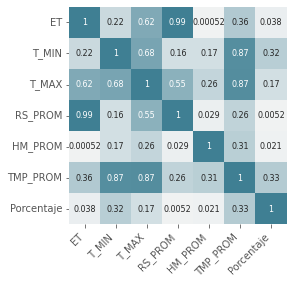

In [29]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix.abs(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [30]:
# División de los datos en train y test
# ==============================================================================
X = df_union_filter[["ET", "T_MIN","T_MAX","RS_PROM","HM_PROM","TMP_PROM"]]
y = df_union_filter['Porcentaje']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [31]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.8609
Date:                Sun, 10 Oct 2021   Prob (F-statistic):              0.557
Time:                        20:17:30   Log-Likelihood:                -51.961
No. Observations:                  16   AIC:                             117.9
Df Residuals:                       9   BIC:                             123.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3066    144.256      0.335      0.7

In [32]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'HM_PROM')
X_test  = X_test.drop(columns = 'HM_PROM')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.143
Date:                Sun, 10 Oct 2021   Prob (F-statistic):              0.399
Time:                        20:17:30   Log-Likelihood:                -51.973
No. Observations:                  16   AIC:                             115.9
Df Residuals:                      10   BIC:                             120.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3265     59.845      1.058      0.3

In [33]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'ET')
X_test  = X_test.drop(columns = 'ET')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     1.416
Date:                Sun, 10 Oct 2021   Prob (F-statistic):              0.292
Time:                        20:17:30   Log-Likelihood:                -52.268
No. Observations:                  16   AIC:                             114.5
Df Residuals:                      11   BIC:                             118.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5736     22.627      1.307      0.2

In [34]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'RS_PROM')
X_test  = X_test.drop(columns = 'RS_PROM')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1.946
Date:                Sun, 10 Oct 2021   Prob (F-statistic):              0.176
Time:                        20:17:30   Log-Likelihood:                -52.419
No. Observations:                  16   AIC:                             112.8
Df Residuals:                      12   BIC:                             115.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7112     20.052      1.681      0.1

In [40]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'T_MAX')
X_test  = X_test.drop(columns = 'T_MAX')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.675
Date:                Sun, 10 Oct 2021   Prob (F-statistic):              0.225
Time:                        20:19:46   Log-Likelihood:                -53.756
No. Observations:                  16   AIC:                             113.5
Df Residuals:                      13   BIC:                             115.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8611     19.988      1.244      0.2

### Intervalos de confianza de los coeficientes

In [35]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-9.977496,77.399833
T_MIN,-8.798586,0.430602
T_MAX,-9.859597,1.890763
TMP_PROM,-3.058102,17.090750


In [36]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

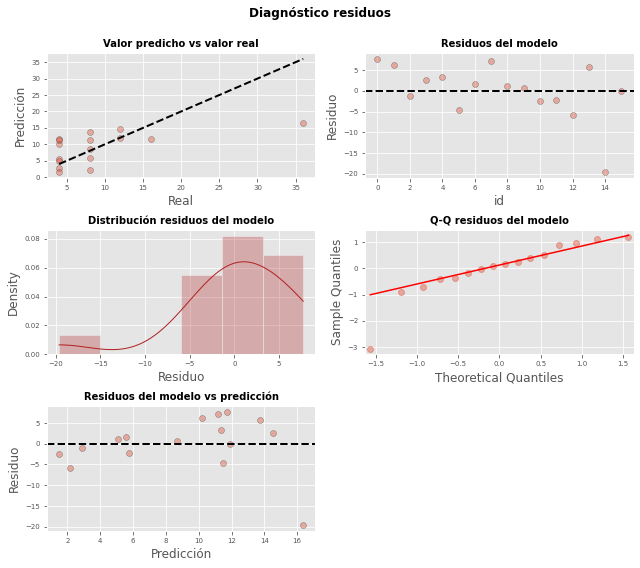

In [37]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [38]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
5,11.721440,2.294546,6.722055,16.720826,-5.152979,28.595860
4,10.214780,2.588622,4.574658,15.854902,-6.860440,27.290000
0,2.879265,5.087946,-8.206417,13.964946,-16.682036,22.440566
8,14.522574,3.138186,7.685055,21.360093,-2.984677,32.029825


In [39]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 18.248425418576055
